In [25]:
import numpy as np
from matplotlib import pyplot as plt, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [26]:
# Parameters
nx = 50
ny = 50
nt  = 100
xmin = 0
xmax = 2
ymin = 0
ymax = 1

dx = (xmax - xmin) / (nx - 1)
dy = (ymax - ymin) / (ny - 1)

# Initialization
p  = np.zeros((ny, nx))
pd = np.zeros((ny, nx))
b  = np.zeros((ny, nx))
x  = np.linspace(xmin, xmax, nx)
y  = np.linspace(xmin, xmax, ny)

# Source
b[int(ny / 4), int(nx / 4)]  = 100
b[int(3 * ny / 4), int(3 * nx / 4)] = -100

In [27]:
for it in range(nt):

    pd = p.copy()

    p[1:-1,1:-1] = (((pd[1:-1, 2:] + pd[1:-1, :-2]) * dy**2 +
                    (pd[2:, 1:-1] + pd[:-2, 1:-1]) * dx**2 -
                    b[1:-1, 1:-1] * dx**2 * dy**2) / 
                    (2 * (dx**2 + dy**2)))

    p[0, :] = 0
    p[ny-1, :] = 0
    p[:, 0] = 0
    p[:, nx-1] = 0


In [28]:
def plot2D(x, y, p):
    fig = plt.figure(figsize=(11, 7), dpi=100)
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

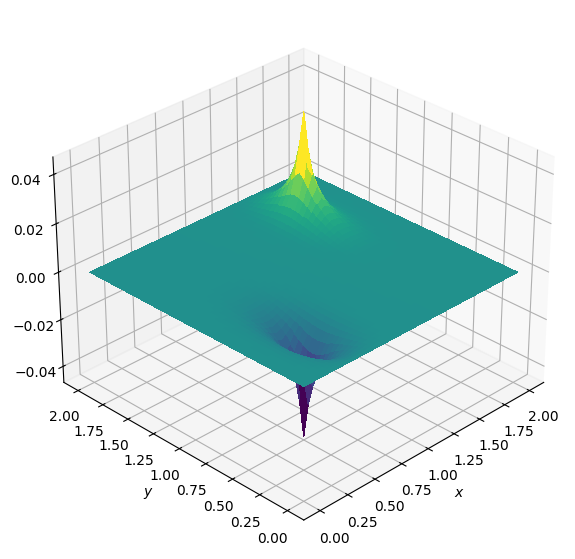

In [29]:
plot2D(x, y, p)